In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from fbprophet import Prophet

In [2]:
a=pd.read_excel("/home/jash/Desktop/prophet/forecast.xlsx")


In [ ]:
a.plot(x='date', y='Policycount', style='o')
a.rename(columns={'date': 'ds', 'Policycount': 'y'}, inplace = True)
last3data=a.iloc[-90:]
print last3data.head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


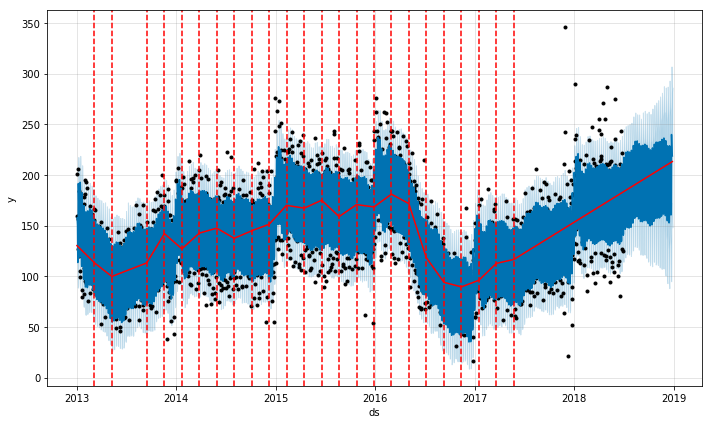

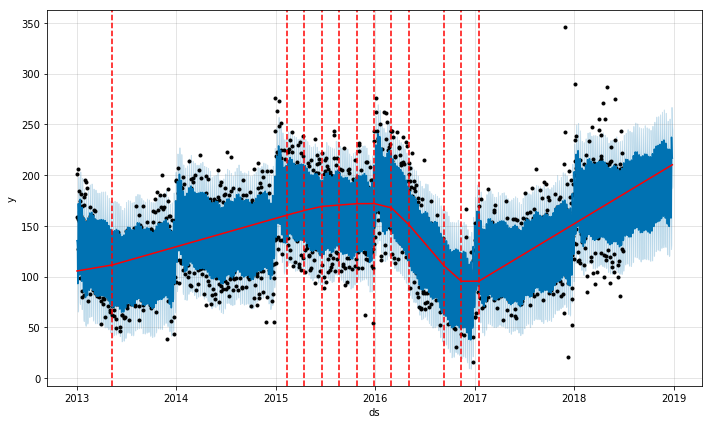

In [4]:
def forecasting(cps,period,dataframe):
    from fbprophet.plot import add_changepoints_to_plot
    changed=Prophet(changepoint_prior_scale=cps)
    changed.fit(dataframe)
    future=changed.make_future_dataframe(periods=period)
    forecast=changed.predict(future)
    fig=changed.plot(forecast)
    p=add_changepoints_to_plot(fig.gca(),changed,forecast)
    return changed

changed1=forecasting(10,180,a)
changed2=forecasting(.05,180,a)



In [5]:
print a.iloc[1790]

ds    2017-11-27 00:00:00
y                     346
Name: 1790, dtype: object


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


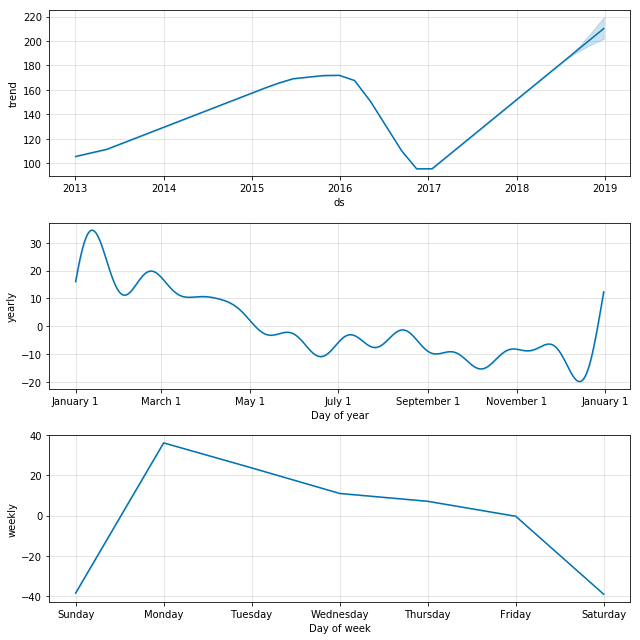

In [6]:
def plot_comp(dataframe,cps,period):
    m=Prophet(changepoint_prior_scale=cps)
    m.fit(dataframe)
    future=m.make_future_dataframe(periods=period)
    forecast=m.predict(future)
    fig = m.plot_components(forecast)

plot_comp(a,.05,180)


In [7]:
for i in range(len(a)):
    if(a.iloc[i]['y']>280):
        a.iloc[i]['y']=220
print a.iloc[1790]

ds    2017-11-27 00:00:00
y                     346
Name: 1790, dtype: object


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


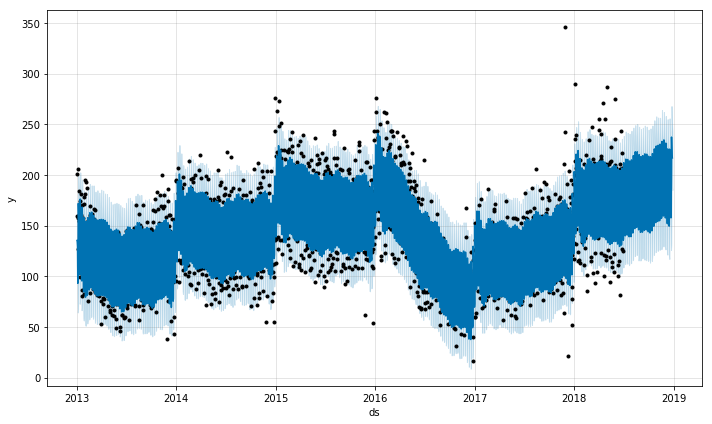

In [8]:
def simpleforecast(cps,period,dataframe):
    changed=Prophet(changepoint_prior_scale=cps)
    changed.fit(dataframe)
    future=changed.make_future_dataframe(periods=period)
    forecast=changed.predict(future)
    fig=changed.plot(forecast)
    return changed

changed=simpleforecast(.05,180,a)

In [9]:
def simpleforecastwithoutplot(cps,period,dataframe):
    changed=Prophet(changepoint_prior_scale=cps)
    changed.fit(dataframe)
    future=changed.make_future_dataframe(periods=period)
    forecast=changed.predict(future)
    return changed

changed=simpleforecastwithoutplot(.05,180,a)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
from fbprophet.diagnostics import cross_validation

def last6monthscrossval(dataframe,init,per,hor,cps,period):
    m=simpleforecastwithoutplot(cps,period,dataframe)
    df_cv = cross_validation(m, initial=str(init)+'days', period=str(per)+'days', horizon =str(hor)+'days')
    df_cv.tail()
    last6=df_cv.iloc[-181:]
    last6 = last6.reset_index(drop=True)
    return last6

last6=last6monthscrossval(a,365,90,90,.05,180)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 18 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-04-01 00:00:00


In [11]:
#calculating mape for the last 6 months

def last6averagemape(last6):
    mape=np.zeros(shape=(len(last6),1))
    for i in range(len(last6)):
        mape[i]=math.fabs((last6.iloc[i]['yhat']-last6.loc[i]['y'])/last6.iloc[i]['y'])
    return np.mean(mape)*100 
    
t=last6averagemape(last6)


In [12]:
#investigating 

from fbprophet.diagnostics import cross_validation

def first3monthscrossval(dataframe,init,per,hor,cps,period):
    m=simpleforecastwithoutplot(cps,period,dataframe)
    df_cv = cross_validation(m, initial=str(init)+'days', period=str(per)+'days', horizon =str(hor)+'days')
    df_cv.tail()
    last6=df_cv.iloc[-181:-91]
    last6 = last6.reset_index(drop=True)
    return last6

def last3monthscrossval(dataframe,init,per,hor,cps,period):
    m=simpleforecastwithoutplot(cps,period,dataframe)
    df_cv = cross_validation(m, initial=str(init)+'days', period=str(per)+'days', horizon =str(hor)+'days')
    df_cv.tail()
    last6=df_cv.iloc[-90:]
    last6 = last6.reset_index(drop=True)
    return last6

f3=first3monthscrossval(a,365,90,90,.5,90)
l3=last3monthscrossval(a,365,90,90,.5,90)

print f3.head()
print l3.head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 18 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-04-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 18 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-04-01 00:00:00


          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2018-01-01  204.528101  176.568232  228.994095  167 2017-10-03
1 2018-01-02  191.515572  165.143549  217.218702  290 2018-01-01
2 2018-01-03  181.750267  155.239819  206.686822  214 2018-01-01
3 2018-01-04  178.922145  151.992333  204.741534  235 2018-01-01
4 2018-01-05  175.116127  146.708543  201.747443  200 2018-01-01
          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2018-04-02  207.785293  179.717613  234.762418  244 2018-04-01
1 2018-04-03  196.096327  168.423812  223.435644  255 2018-04-01
2 2018-04-04  183.555902  155.771390  207.466361  214 2018-04-01
3 2018-04-05  179.054886  153.157937  206.746920  186 2018-04-01
4 2018-04-06  172.581640  146.074417  201.221838  201 2018-04-01


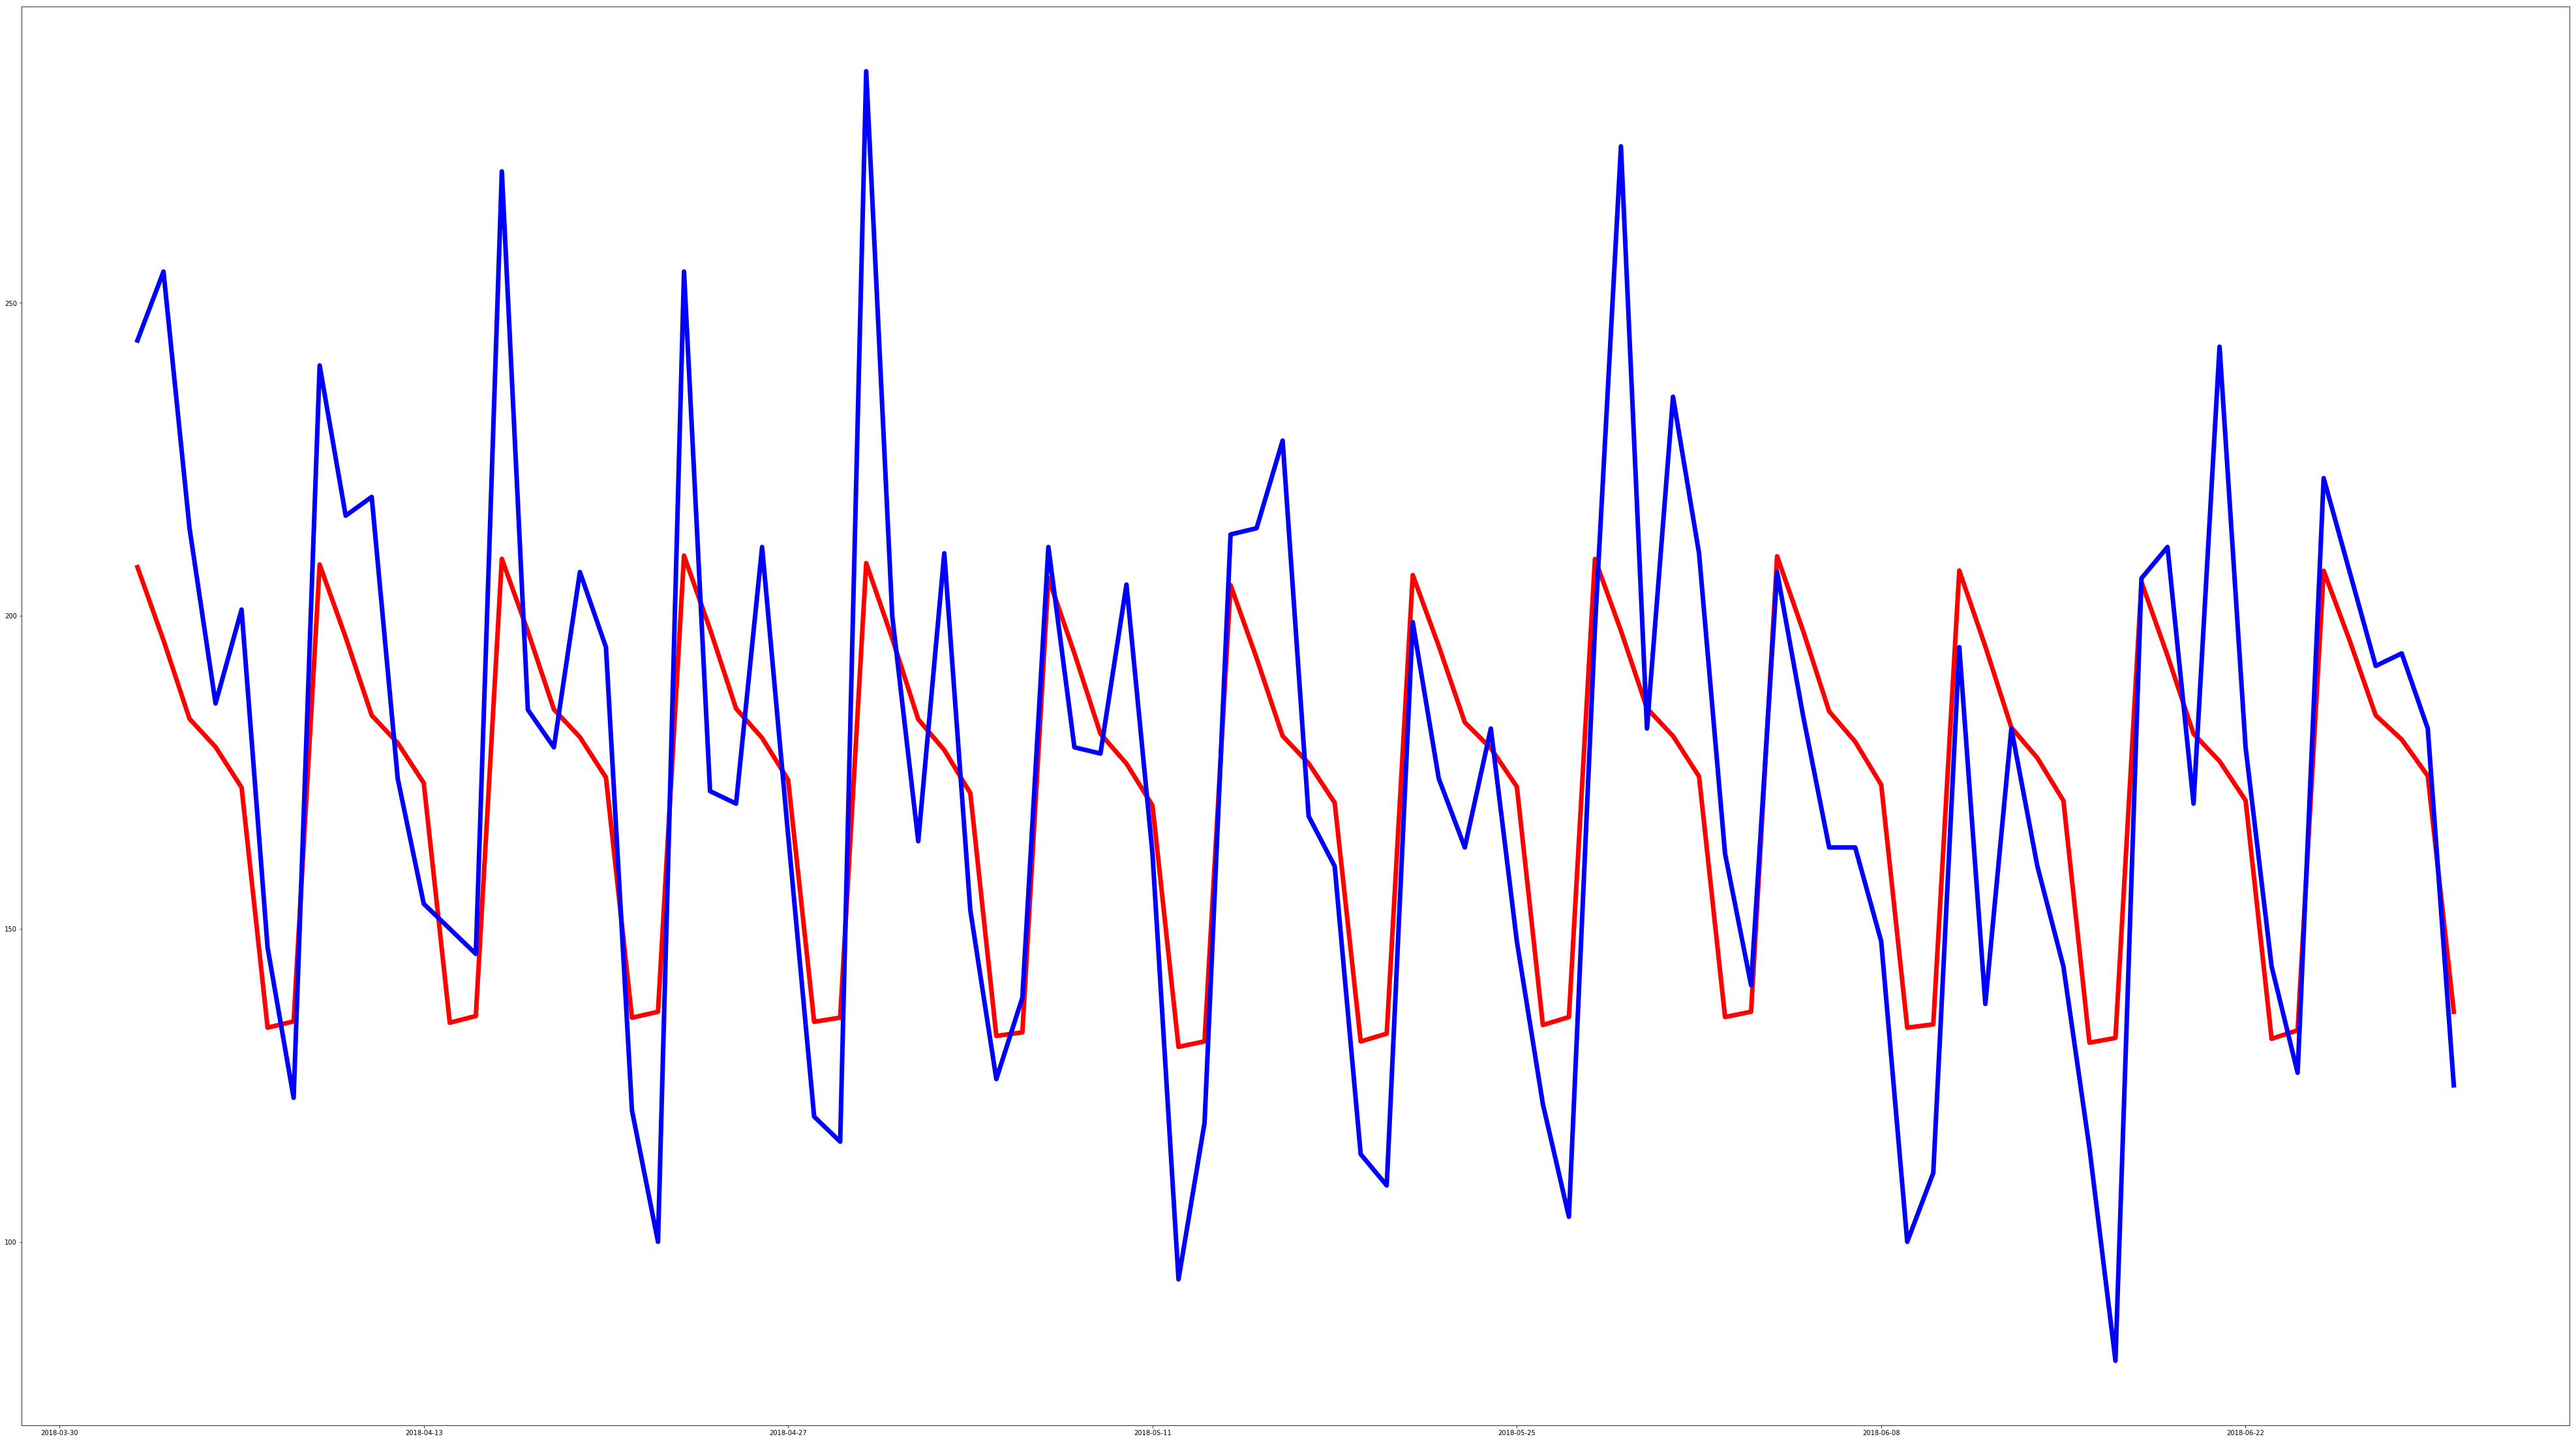

In [13]:
def plotdaily(dataframe):
    last6=dataframe
    fig=plt.figure(figsize=(70,40))
    plt.plot(last6['ds'],last6['yhat'],color='red',linewidth=7)
    plt.plot(last6['ds'],last6['y'],color='blue',linewidth=7)


plotdaily(l3)

In [14]:
#estimating peaks points of high error
i=0
for i in range(len(l3)):
    if(l3.iloc[i]['y']-l3.iloc[i]['yhat']>30):
        print "date is",l3.iloc[i]['ds'],"yhat is",l3.iloc[i]['yhat'],"y is",l3.iloc[i]['y']

date is 2018-04-02 00:00:00 yhat is 207.7852927135996 y is 244
date is 2018-04-03 00:00:00 yhat is 196.09632717057264 y is 255
date is 2018-04-04 00:00:00 yhat is 183.5559016087215 y is 214
date is 2018-04-09 00:00:00 yhat is 208.1952595386356 y is 240
date is 2018-04-11 00:00:00 yhat is 184.1048480124832 y is 219
date is 2018-04-16 00:00:00 yhat is 209.10774426749833 y is 271
date is 2018-04-23 00:00:00 yhat is 209.62950252748936 y is 255
date is 2018-04-26 00:00:00 yhat is 180.49821433932527 y is 211
date is 2018-04-30 00:00:00 yhat is 208.42393918073205 y is 287
date is 2018-05-03 00:00:00 yhat is 178.56488378608552 y is 210
date is 2018-05-16 00:00:00 yhat is 180.80062935552226 y is 228
date is 2018-05-29 00:00:00 yhat is 197.61361114485118 y is 275
date is 2018-05-31 00:00:00 yhat is 180.80718277866094 y is 235
date is 2018-06-01 00:00:00 yhat is 174.34366801745693 y is 210
date is 2018-06-21 00:00:00 yhat is 176.77984997567808 y is 243


In [15]:
#estimating dates of low error and y is more than yhat
i=0
for i in range(len(l3)):
    if((l3.iloc[i]['y']-l3.iloc[i]['yhat']<10)and(l3.iloc[i]['y']-l3.iloc[i]['yhat']>0)):
        print "date is",l3.iloc[i]['ds'],"yhat is",l3.iloc[i]['yhat'],"y is",l3.iloc[i]['y']


date is 2018-04-05 00:00:00 yhat is 179.05488598022157 y is 186
date is 2018-04-15 00:00:00 yhat is 136.07165427543586 y is 146
date is 2018-05-01 00:00:00 yhat is 196.38166106278186 y is 200
date is 2018-05-06 00:00:00 yhat is 133.46655391329156 y is 139
date is 2018-05-07 00:00:00 yhat is 206.03255783013256 y is 211
date is 2018-05-14 00:00:00 yhat is 204.91412746774503 y is 213
date is 2018-05-24 00:00:00 yhat is 178.84257493597832 y is 182
date is 2018-06-03 00:00:00 yhat is 136.75711503552287 y is 141
date is 2018-06-18 00:00:00 yhat is 205.38146952780423 y is 206
date is 2018-06-22 00:00:00 yhat is 170.51561492140095 y is 179
date is 2018-06-27 00:00:00 yhat is 184.1038708649857 y is 192
date is 2018-06-29 00:00:00 yhat is 174.43451345596625 y is 182


In [16]:
#estimating peaks points of high error
i=0
flag=1
for i in range(len(l3)):
    if(l3.iloc[i]['y']-l3.iloc[i]['yhat']>30):
        if(flag==1):
            print "\n"
        flag=0
        print "date is",l3.iloc[i]['ds'],"   high error"
        
    if((l3.iloc[i]['y']-l3.iloc[i]['yhat']<15)and(l3.iloc[i]['y']-l3.iloc[i]['yhat']>0)):
        if(flag==0):
            print "\n"
        flag=1
        print "date is",l3.iloc[i]['ds'],"   less error"



date is 2018-04-02 00:00:00    high error
date is 2018-04-03 00:00:00    high error
date is 2018-04-04 00:00:00    high error


date is 2018-04-05 00:00:00    less error
date is 2018-04-07 00:00:00    less error


date is 2018-04-09 00:00:00    high error
date is 2018-04-11 00:00:00    high error


date is 2018-04-14 00:00:00    less error
date is 2018-04-15 00:00:00    less error


date is 2018-04-16 00:00:00    high error
date is 2018-04-23 00:00:00    high error
date is 2018-04-26 00:00:00    high error
date is 2018-04-30 00:00:00    high error


date is 2018-05-01 00:00:00    less error


date is 2018-05-03 00:00:00    high error


date is 2018-05-06 00:00:00    less error
date is 2018-05-07 00:00:00    less error
date is 2018-05-14 00:00:00    less error


date is 2018-05-16 00:00:00    high error


date is 2018-05-24 00:00:00    less error


date is 2018-05-29 00:00:00    high error
date is 2018-05-31 00:00:00    high error
date is 2018-06-01 00:00:00    high error


date is 20

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


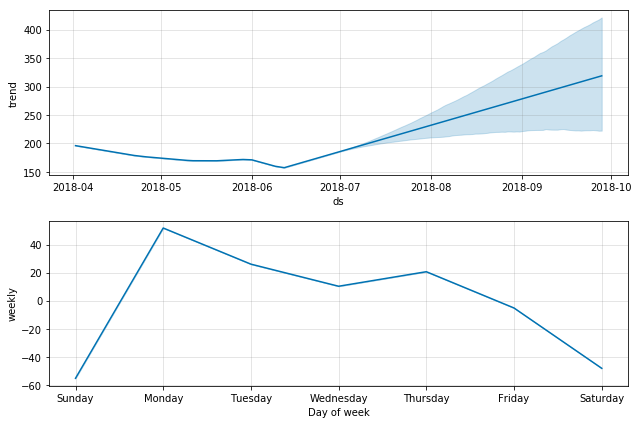

In [17]:
plot_comp(last3data,.5,90)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


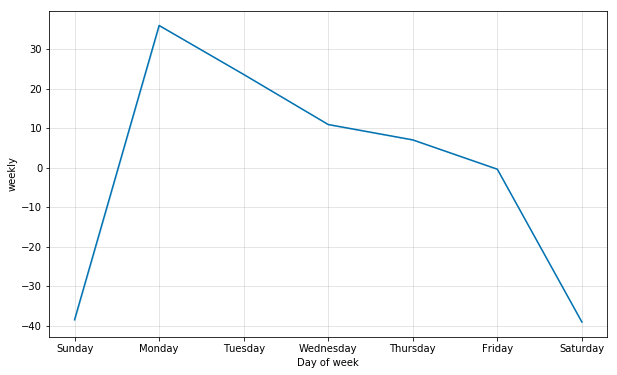

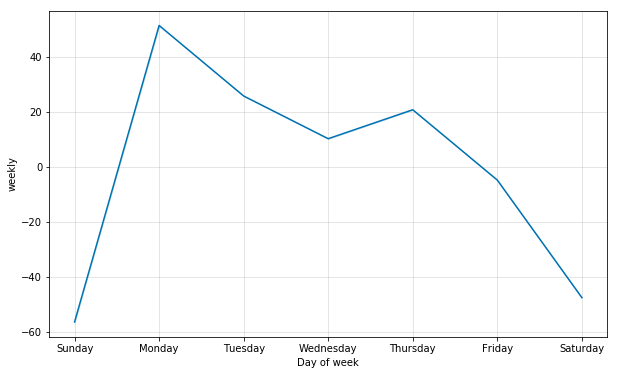

In [43]:
from fbprophet.plot import plot_weekly
m=Prophet(changepoint_prior_scale=.05)
m.fit(a)
future=m.make_future_dataframe(periods=90)
forecast=m.predict(future)
k=Prophet(changepoint_prior_scale=.05)
k.fit(last3data)
future=k.make_future_dataframe(periods=90)
forecast=k.predict(future)
plot_weekly(m)
plot_weekly(k)




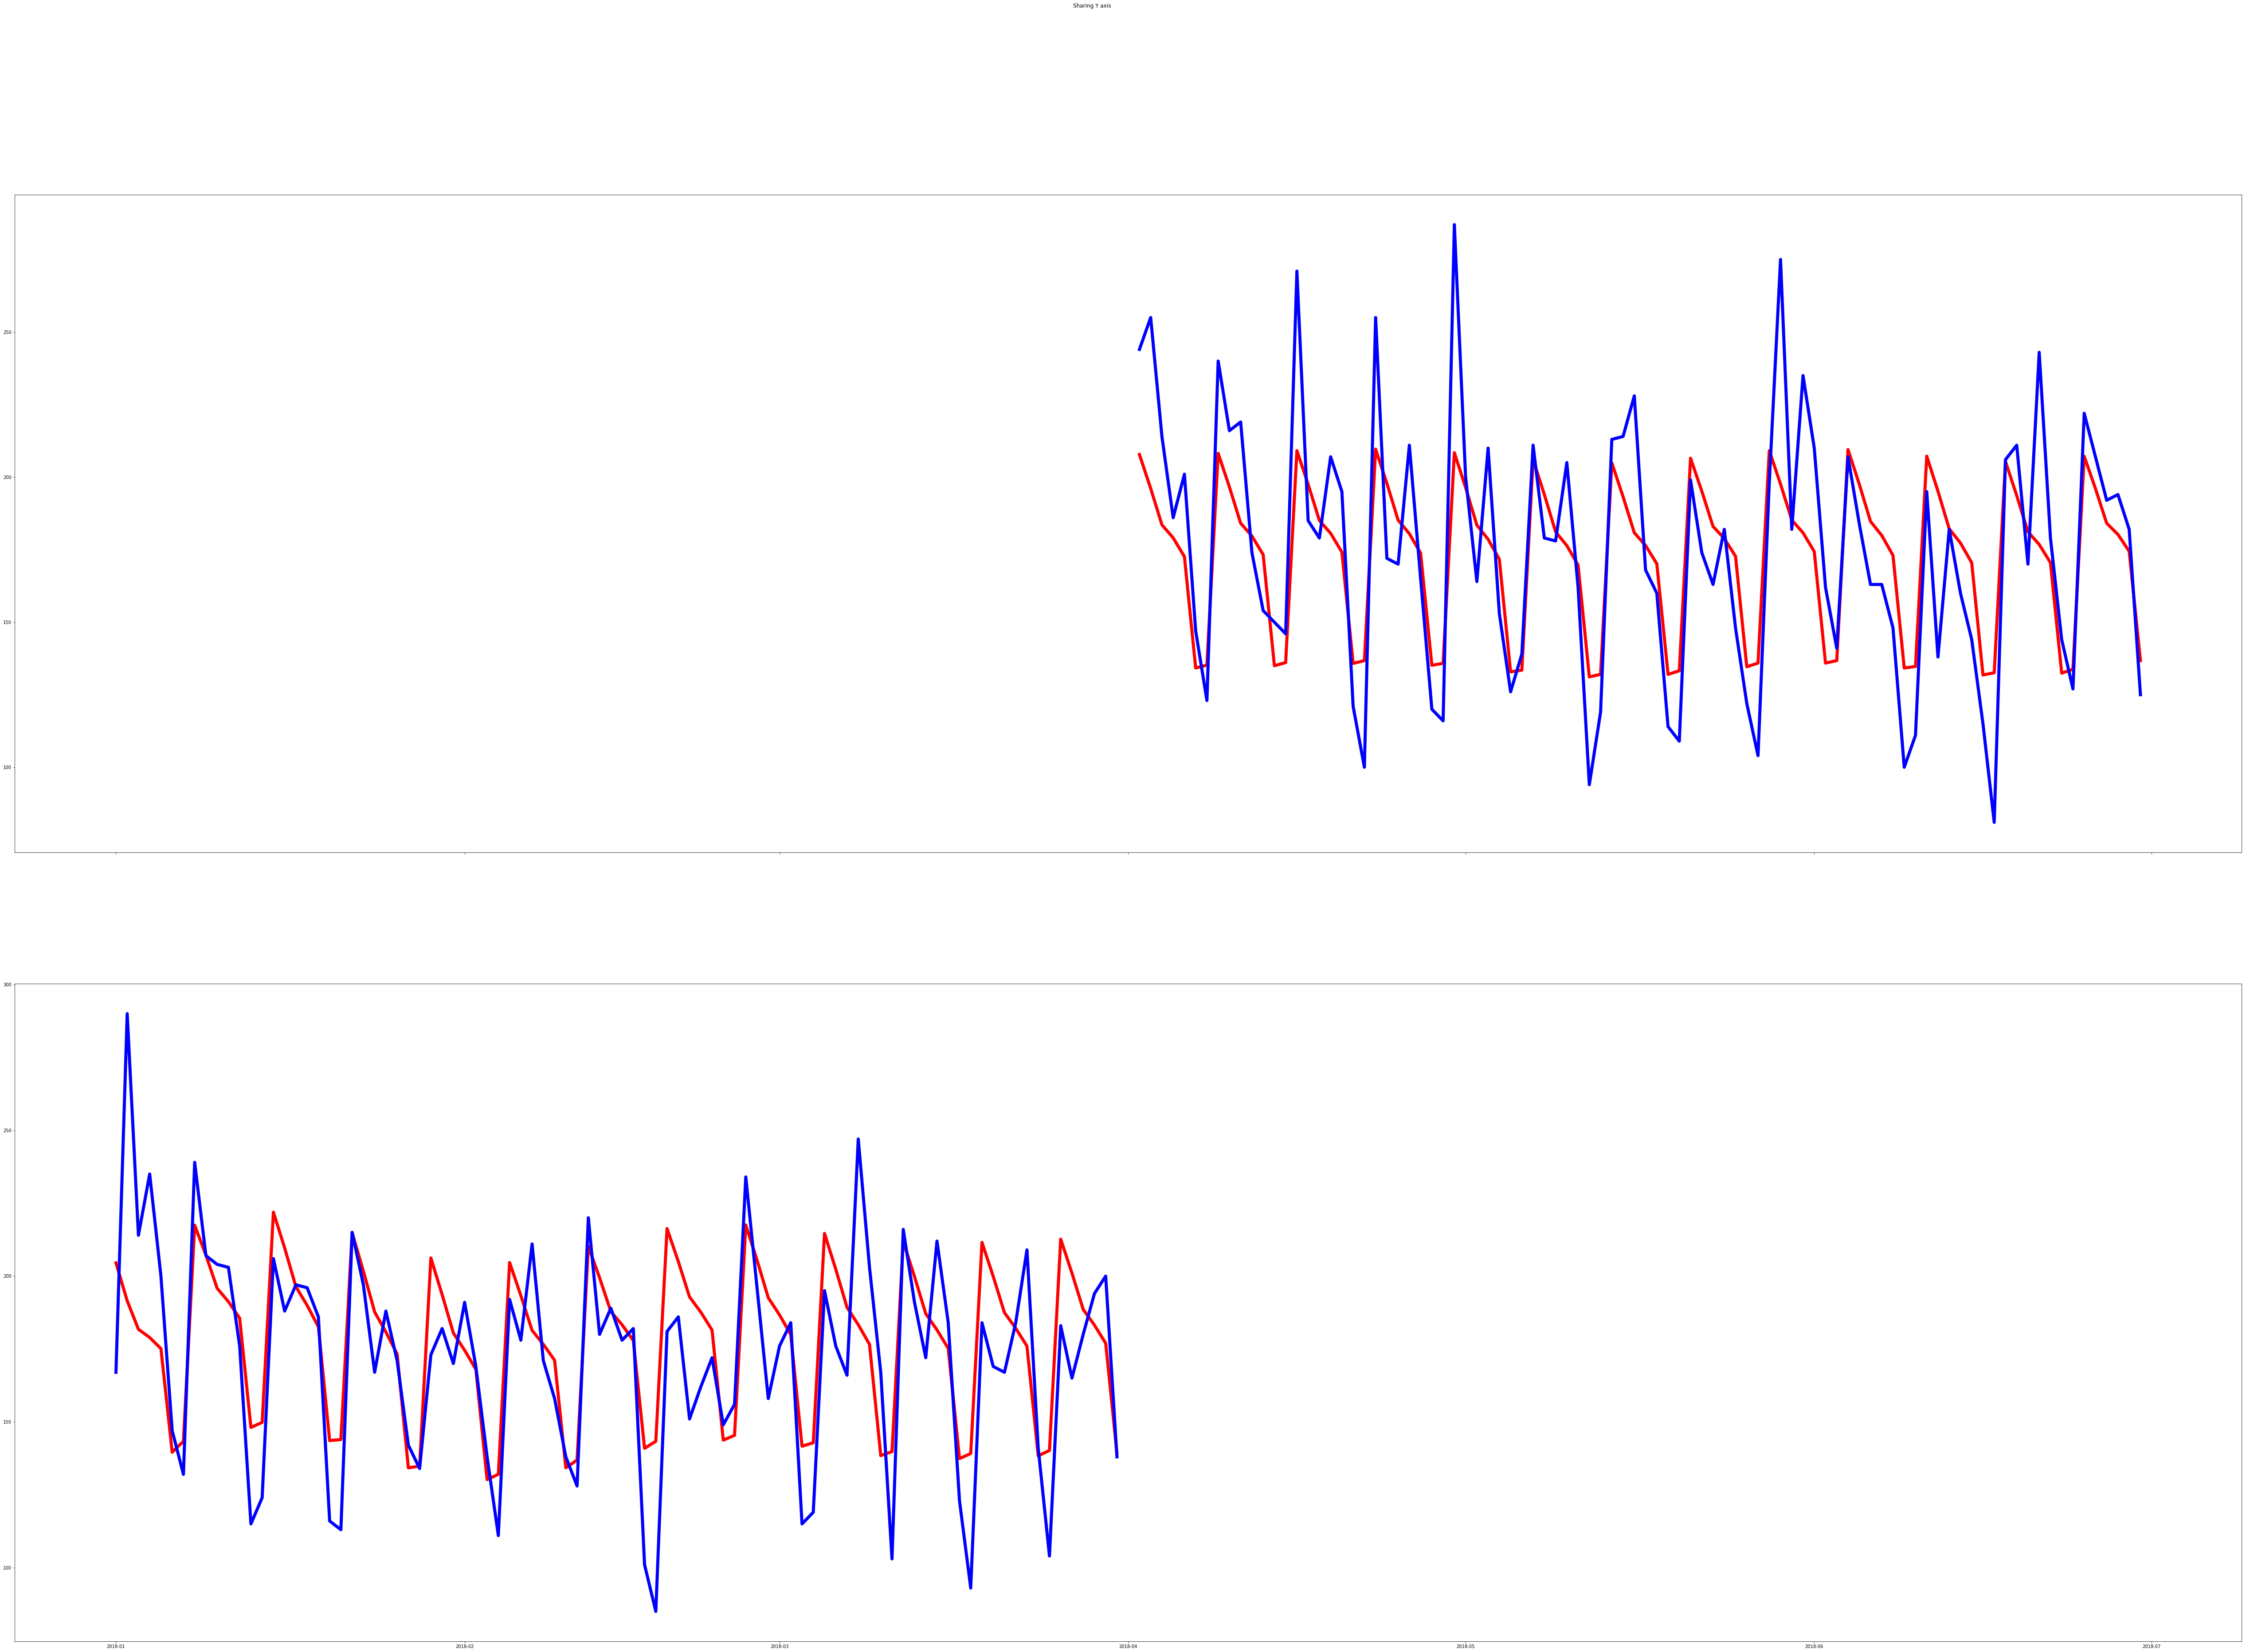

In [18]:
f, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(90,60))
f.suptitle('Sharing Y axis')

ax1.plot(l3['ds'],l3['yhat'],color='red',linewidth=7)
ax1.plot(l3['ds'],l3['y'],color='blue',linewidth=7)
ax2.plot(f3['ds'],f3['yhat'],color='red',linewidth=7)
ax2.plot(f3['ds'],f3['y'],color='blue',linewidth=7)

In [19]:

def last6averagemape(last6):
    mape=np.zeros(shape=(len(last6),1))
    for i in range(len(last6)):
        mape[i]=math.fabs((last6.iloc[i]['yhat']-last6.loc[i]['y'])/last6.iloc[i]['y'])
    return np.mean(mape)*100 
    
first3=last6averagemape(f3)
last3=last6averagemape(l3)
print "mape for the first 3 months of the year is ",first3
print "mape for the last3 months of the year is",last3

mape for the first 3 months of the year is  12.255152810470715
mape for the last3 months of the year is 12.65097069177201


In [20]:
#finding minimum mape for various cps values
def findoptcps(dataframe,init,per,hor):
    k=40
    mapes=np.zeros(shape=(10,1))
    k_values=np.zeros(shape=(10,1))
    while(k<90):        
        last6=last6monthscrossval(a,365,180,180,k,180)
        i=int((k-40)/5)
        mapes[i]=last6averagemape(last6)
        k_values[i]=k
        print "k=",k,"done","mape value is ",mapes[i]
        k=k+5
    return mapes,k_values    
    

mapes,k_values=findoptcps(a,730,180,180)
        
    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 40 done mape value is  [11.5263629]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 45 done mape value is  [11.56178551]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 50 done mape value is  [11.51048888]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 55 done mape value is  [11.45380335]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 60 done mape value is  [11.58299414]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 65 done mape value is  [11.49575981]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 70 done mape value is  [11.52741963]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 75 done mape value is  [11.52216194]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 80 done mape value is  [11.52525113]


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00


k= 85 done mape value is  [11.60335545]


min k is 55.0
minimum mape is 11.453803354773058 for changepoint prior scale = 55.0


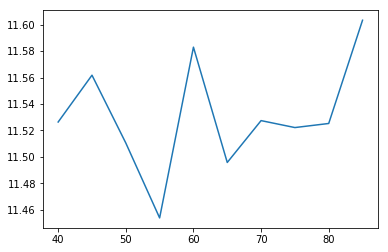

In [21]:
#finding minimum values among all these
plt.plot(k_values,mapes)
min_index=np.argmin(mapes)
print "min k is",k_values[min_index][0]
print "minimum mape is",mapes[min_index][0],"for changepoint prior scale =",k_values[min_index][0]

In [34]:

last6=last6monthscrossval(a,365,180,180,.01,180)
def plotdaily(dataframe):
    last6=dataframe
    fig=plt.figure(figsize=(70,40))
    plt.plot(last6['ds'],last6['yhat'],color='red',linewidth=7)
    plt.plot(last6['ds'],last6['y'],color='blue',linewidth=7)
#trying different cps values
last6=last6monthscrossval(a,365,180,180,.1,180)

#plotting optimum mape value
last6opt=last6monthscrossval(a,365,180,180,55,180)

plotdaily(a)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00


KeyError: 'yhat'

In [ ]:
#Plotting optimum mape curve and other curves
last6=last6monthscrossval(a,365,180,180,.1,180)
f, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(90,60))
f.suptitle('Sharing Y axis')

ax1.plot(last6['ds'],last6['yhat'],color='red',linewidth=7)
ax1.plot(last6['ds'],last6['y'],color='blue',linewidth=7)
ax2.plot(last6opt['ds'],last6opt['yhat'],color='red',linewidth=7)
ax2.plot(last6opt['ds'],last6opt['y'],color='blue',linewidth=7)

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(last6, metric='mape')


In [ ]:
#weekly
def weekly(last6): 
    i=0
    k=0
    mape=pd.DataFrame(columns=['yhat','y'])
    while (i<len(last6)):
        s=last6.iloc[i:i+7]
        yhat=np.sum(s['yhat'])
        y=np.sum(s['y'])
        last6.loc[i:i+7,'weeklyyhat']=yhat
        last6.loc[i:i+7,'weeklyy']=y
        mape.loc[k,'yhat']=yhat
        mape.loc[k,'y']=y
        k=k+1
        i=i+7

    fig=plt.figure(figsize=(70,40))

    plt.plot(mape.index,mape['yhat'],color='red',linewidth=7)
    plt.plot(mape.index,mape['y'],color='blue',linewidth=7) 
    
weekly(last6)



In [ ]:
#monthly

def monthly(last6):    
    i=0
    k=0
    mape=pd.DataFrame(columns=['yhat','y'])
    while (i<len(last6)):
        s=last6.iloc[i:i+30]
        yhat=np.sum(s['yhat'])
        y=np.sum(s['y'])
        last6.loc[i:i+30,'weeklyyhat']=yhat
        last6.loc[i:i+30,'weeklyy']=y
        mape.loc[k,'yhat']=yhat
        mape.loc[k,'y']=y
        k=k+1
        i=i+30

    fig=plt.figure(figsize=(70,40))
    months=pd.Series(['Jan','Feb','March','April','May','June'])
    mape.reindex(index=months)
    plt.plot(mape.index,mape['yhat'],color='red',linewidth=7)
    plt.plot(mape.index,mape['y'],color='blue',linewidth=7)    


monthly(last6)    